In [1]:
# Importing all the required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import soundfile
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
pip install audioread

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("features_3_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [4]:
# Shape of the data
df.shape

(9990, 60)

In [5]:
# Data type of the data
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [6]:
!pip install --upgrade librosa soundfile


Defaulting to user installation because normal site-packages is not writeable


In [7]:
# Loading a sample audio from the dataset
audio ="C:\\Users\\IDEAPAD 5\\Desktop\\speech final\\archive(2)\\Data\\genres_original\\reggae\\reggae.00000.wav"
data,sr=librosa.load(audio)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [8]:
# Initializing sample rate to 45600 we obtain the signal value array
librosa.load(audio,sr=45600)

(array([ 0.00971868,  0.00959029,  0.00767962, ..., -0.0455722 ,
        -0.03400151, -0.01597212], dtype=float32),
 45600)

In [9]:
# Taking Short-time Fourier transform of the signal
y = librosa.stft(data)  
S_db = librosa.amplitude_to_db(np.abs(y), ref=np.max)

In [10]:
# Playing audio file
import IPython
IPython.display.Audio(data,rate=sr)

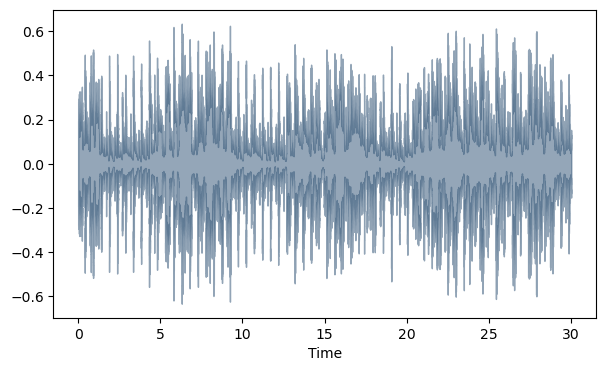

In [11]:
# Wave form of the audio
plt.figure(figsize=(7,4))
librosa.display.waveshow(data,color="#2B4F72", alpha = 0.5)
plt.show()

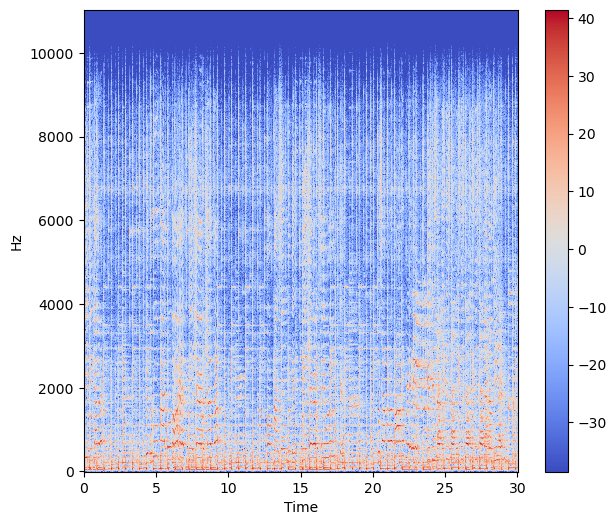

In [12]:
# Spectrogram of the audio
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(7,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

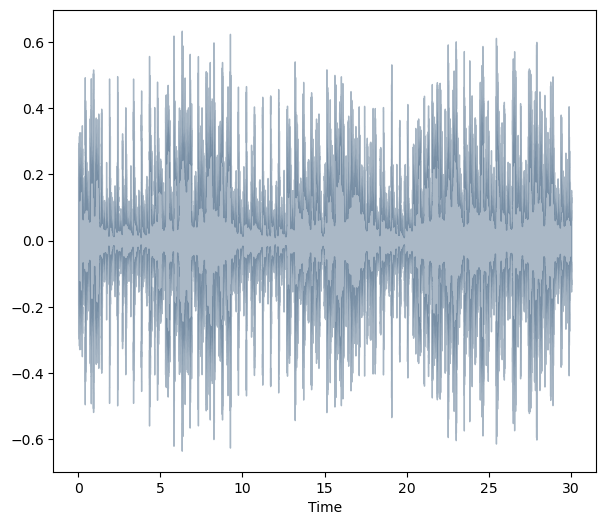

In [13]:
#preproccesing 
spectral_rolloff=librosa.feature.spectral_rolloff(y=data,sr=sr)[0]
plt.figure(figsize=(7,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

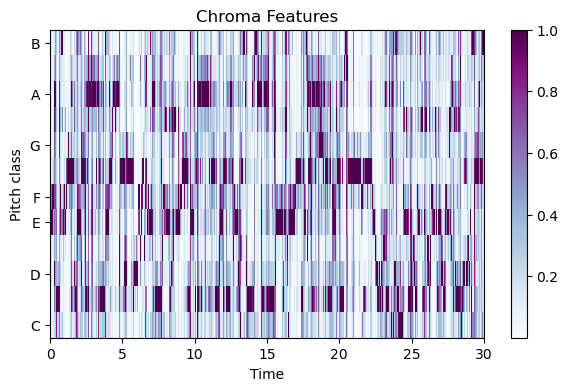

In [14]:
#Chroma feature
#It closely relates with the twelve different pitch classes. Chroma based features are also called as pitch class profiles. It is the powerful tool for analyzing and categorizing them. Harmonic and melodic characteristics of music are captured by them. Chroma featue
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(y=data,sr=sr)
plt.figure(figsize=(7,4))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="BuPu")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

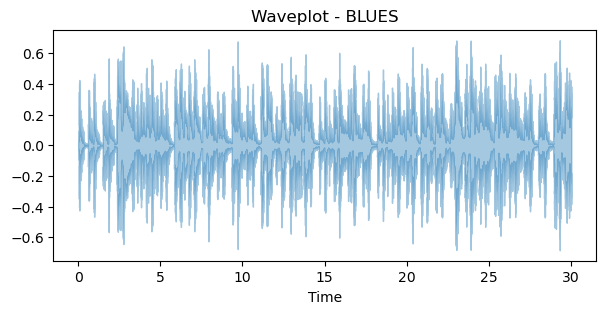

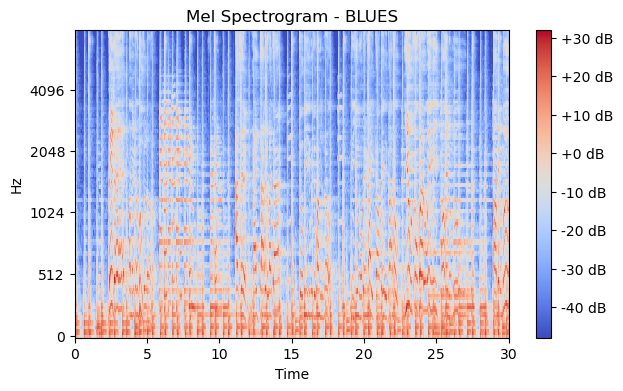

In [15]:
# EDA for all the music genre classes

# 1. BLUES 
audio1= 'C:\\Users\\IDEAPAD 5\\Desktop\\speech final\\archive(2)\\Data\\genres_original\\blues\\blues.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4,)
plt.title('Waveplot - BLUES')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - BLUES')
plt.colorbar(format='%+2.0f dB');
# playing audio
ipd.Audio(audio1) 

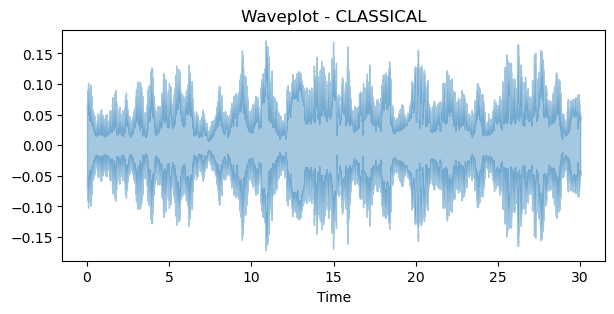

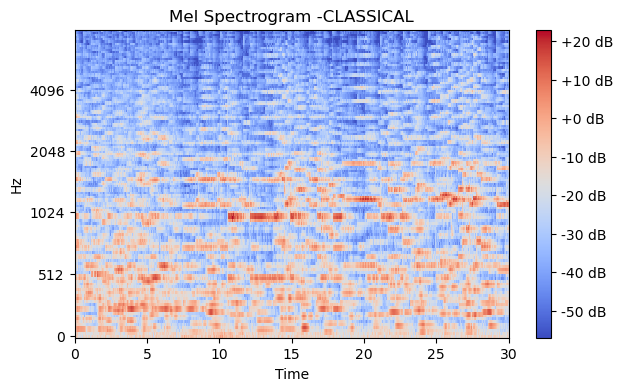

In [16]:
# 2. CLASSICAL -
audio1= 'C:\\Users\\IDEAPAD 5\\Desktop\\speech final\\archive(2)\\Data\\genres_original\\classical\\classical.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - CLASSICAL') 

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram -CLASSICAL')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1) 

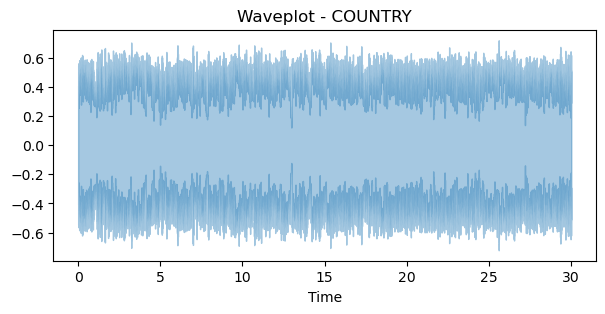

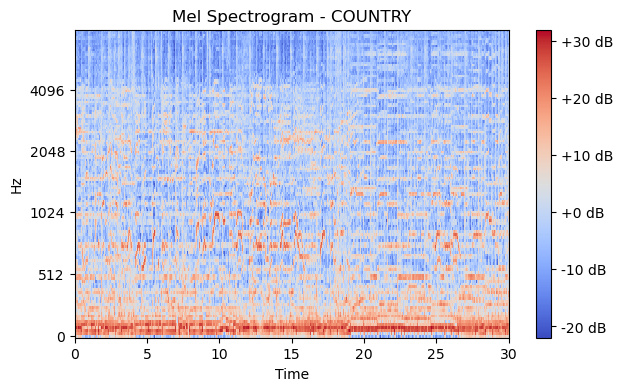

In [17]:
# 3. COUNTRY
audio1= 'C:\\Users\\IDEAPAD 5\\Desktop\\speech final\\archive(2)\\Data\\genres_original\\country\\country.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - COUNTRY')

# Ccreating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - COUNTRY')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [18]:
# Label Encoding - encod the categorical classes with numerical integer values for training

# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4 
# Jazz - 5  
# Metal - 6 
# Pop - 7
# Reggae - 8
# Rock - 9

class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, ..., 9, 9, 9])

In [19]:
#features
print(df.iloc[:,:-1])

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [20]:
# Drop the column filename as it is no longer required for training
df=df.drop(labels="filename",axis=1)

In [21]:
#scaling
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [22]:
# splitting 70% data into training set and the remaining 30% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
# test data size
len(y_test)

2997

In [24]:
# size of training data
len(y_train)

6993

Training set score: 0.921
Test set score: 0.845
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       284
           1       0.89      0.97      0.93       291
           2       0.78      0.81      0.79       294
           3       0.78      0.83      0.80       333
           4       0.89      0.83      0.86       294
           5       0.86      0.87      0.87       312
           6       0.89      0.91      0.90       288
           7       0.87      0.84      0.86       300
           8       0.88      0.83      0.85       304
           9       0.78      0.71      0.74       297

    accuracy                           0.84      2997
   macro avg       0.85      0.85      0.84      2997
weighted avg       0.85      0.84      0.84      2997



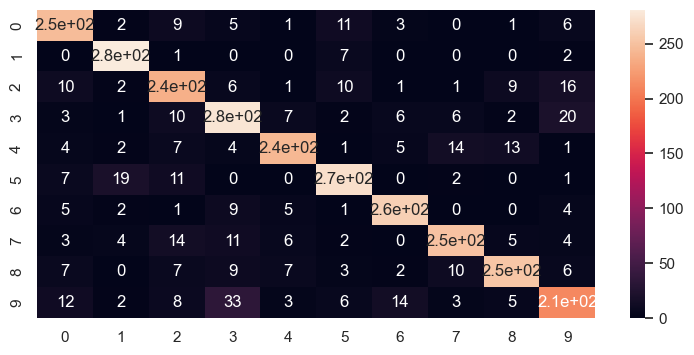

In [25]:

# Applying Support Vector Machines to predict the results
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(X_train, y_train)
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize': (9, 4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))


In [26]:
from sklearn.model_selection import GridSearchCV
#Fine-tune the hyperparameters
# Define the parameter grid
#The GridSearchCV with cv=5 specifies 5-fold cross-validation, meaning the training set is split into 5 subsets (folds)
# and the model is trained and evaluated 5 times, each time using a different fold as the validation set.
#The validation set, in this case, is implicitly included in the cross-validation process, as GridSearchCV 
#internally handles the splitting of the training set into training and validation folds.
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2, 3, 4]}

# Create an SVM model
svm = SVC()
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_svm = grid_search.best_estimator_

Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}


In [27]:
#Calculate and report additional metrics such as precision,
#recall, and F1 score for each class. You can use the classification_report function.
from sklearn.metrics import classification_report

# Predictions on the test set using the best model
y_pred = best_svm.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       284
           1       0.92      0.98      0.95       291
           2       0.85      0.89      0.87       294
           3       0.90      0.91      0.90       333
           4       0.94      0.93      0.94       294
           5       0.92      0.92      0.92       312
           6       0.95      0.95      0.95       288
           7       0.92      0.88      0.90       300
           8       0.92      0.91      0.91       304
           9       0.91      0.84      0.87       297

    accuracy                           0.91      2997
   macro avg       0.91      0.91      0.91      2997
weighted avg       0.91      0.91      0.91      2997



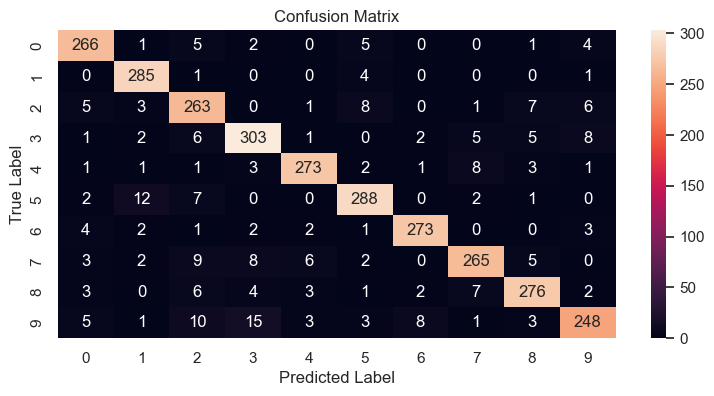

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

